In [568]:
import pandas as pd 


In [569]:
df = pd.read_csv("Train.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [570]:
df.nunique()






PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [571]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [572]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [573]:
del_columns = ['Cabin', 'Ticket', 'PassengerId']

df.drop(columns=del_columns, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [574]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [575]:
df['Age'] = df["Age"].fillna(df["Age"].mean())

In [576]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [577]:
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)


In [578]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(1)
memory usage: 57.6+ KB


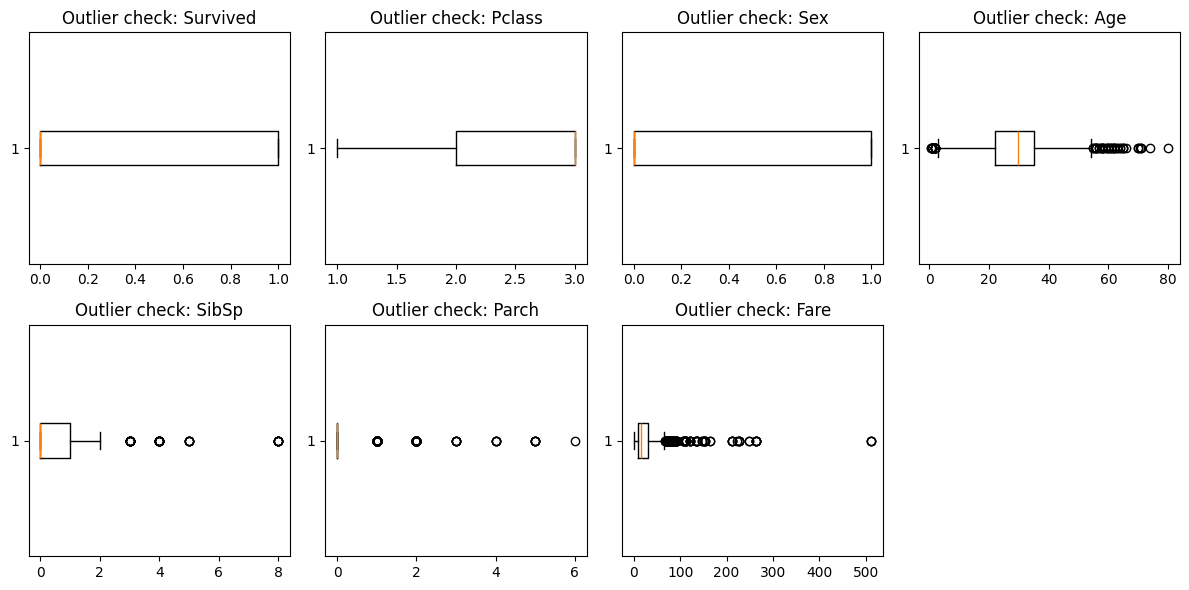


Colonna: Survived
Numero di outlier: 0

Colonna: Pclass
Numero di outlier: 0

Colonna: Sex
Numero di outlier: 0

Colonna: Age
Numero di outlier: 66
[ 2.   58.   55.    2.   66.   65.    0.83 59.   71.   70.5 ]

Colonna: SibSp
Numero di outlier: 46
[3 4 3 3 4 5 3 4 5 3]

Colonna: Parch
Numero di outlier: 213
[1 2 1 5 1 1 5 2 2 1]

Colonna: Fare
Numero di outlier: 116
[ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
 263.      77.2875]


In [580]:
import matplotlib.pyplot as plt
import numpy as np

# seleziona solo colonne numeriche
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    if len(data) == 0:
        continue
    plt.subplot(2, 4, i+1)
    plt.boxplot(data, vert=False)
    plt.title(f"Outlier check: {col}")

plt.tight_layout()
plt.show()

# Funzione per calcolare outlier con regola IQR
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Report degli outlier per ogni colonna numerica
for col in numeric_cols:
    outliers = find_outliers(df[col].dropna())
    print(f"\nColonna: {col}")
    print(f"Numero di outlier: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.values[:10])  # mostra i primi 10 valori outlier



In [581]:
for col in numeric_cols:
    outliers = find_outliers(df[col].dropna())
    df = df.drop(outliers.index)


In [582]:
df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
# Raggruppiamo titoli rari
df["Title"] = df["Title"].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df["Title"] = df["Title"].replace(['Mlle','Ms'], 'Miss')
df["Title"] = df["Title"].replace('Mme', 'Mrs')
df["Title"] = df["Title"].astype("category").cat.codes
df.drop(columns=["Name"], inplace=True)


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\sorre\AppData\Local\Temp\ipykernel_4352\3050836189.py:1: SyntaxWarning: invalid escape sequence '\.'
  df["Title"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)


In [583]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000), # Intero tra 100 e 1000
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True), # Scala logaritmica
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0), # % feature per albero
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True), # L1 Reg (Lasso)
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True), # L2 Reg (Ridge)
        'n_jobs': -1,
        'random_state': 42
    }
    
    model = xgb.XGBClassifier(**params)
    
    
    # C. Validazione Robusta (Cross-Validation)
    # Usiamo 5-Fold per essere sicuri che il risultato non sia fortuna
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Restituiamo la media dell'accuratezza
    return scores.mean()

# --- 3. Creazione dello Studio ---
print("--- Inizio Ottimizzazione Bayesiana ---")
# direction='maximize' perché vogliamo ALTA accuratezza (se fosse RMSE useremmo minimize)
study = optuna.create_study(direction='maximize', study_name="XGBoost_Titanic")


# Lanciamo l'ottimizzazione (es. 50 tentativi)
# Optuna mostrerà una progress bar con i risultati in tempo reale
study.optimize(objective, n_trials=50, show_progress_bar=True)

# --- 4. Risultati ---
print("\n--- Risultati Ottimizzazione ---")
print(f"Miglior Trial (Tentativo #{study.best_trial.number})")
print(f"Accuratezza Migliore (CV): {study.best_value:.4f}")
print("Migliori Iperparametri:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

# --- 5. Validazione Finale sul Test Set ---
# Ricostruiamo il modello con i parametri vincenti
best_params = study.best_params
final_model = xgb.XGBClassifier(**best_params, n_jobs=-1, random_state=42)
final_model.fit(X_train, y_train)
final_acc = final_model.score(X_test, y_test)

print(f"\nAccuratezza Finale sul Test Set: {final_acc:.4f}")
    


[I 2025-12-05 12:28:28,031] A new study created in memory with name: XGBoost_Titanic


--- Inizio Ottimizzazione Bayesiana ---


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-12-05 12:28:29,102] Trial 0 finished with value: 0.8347815230961299 and parameters: {'n_estimators': 713, 'learning_rate': 0.0012703441753412759, 'max_depth': 5, 'subsample': 0.9449381421439617, 'colsample_bytree': 0.9547946409536345, 'reg_alpha': 2.682280971597637e-05, 'reg_lambda': 2.982630643469545e-06}. Best is trial 0 with value: 0.8347815230961299.
[I 2025-12-05 12:28:29,960] Trial 1 finished with value: 0.8147315855181023 and parameters: {'n_estimators': 387, 'learning_rate': 0.022381473177538382, 'max_depth': 8, 'subsample': 0.9954831963450133, 'colsample_bytree': 0.8424838499427252, 'reg_alpha': 2.5795607525750758e-08, 'reg_lambda': 0.0008803731405777315}. Best is trial 0 with value: 0.8347815230961299.
[I 2025-12-05 12:28:30,929] Trial 2 finished with value: 0.834756554307116 and parameters: {'n_estimators': 847, 'learning_rate': 0.0017052378186883715, 'max_depth': 4, 'subsample': 0.7360134133031765, 'colsample_bytree': 0.8865601186506162, 'reg_alpha': 6.7413819462251